In [2]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [18]:
#1 Which states have the most sales?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("US Superstore data.xls")

%matplotlib inline
#Removal of duplicates
df = df.drop_duplicates()
#datetime format for date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
#df.head()
#removal of missing  data
missing_data = df.isnull().sum()

#States with the most sales
#Sum the sales data by State column and sort the results in descending order
state_sales = df.groupby('State')['Sales'].sum()
state_sales = state_sales.sort_values(ascending=False) 

print(state_sales.head(10))

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


Total Sales and Profit:
        State        Sales      Profit
0  California  457687.6315  76381.3871
1    New York  310876.2710  74038.5486


<Figure size 800x600 with 0 Axes>

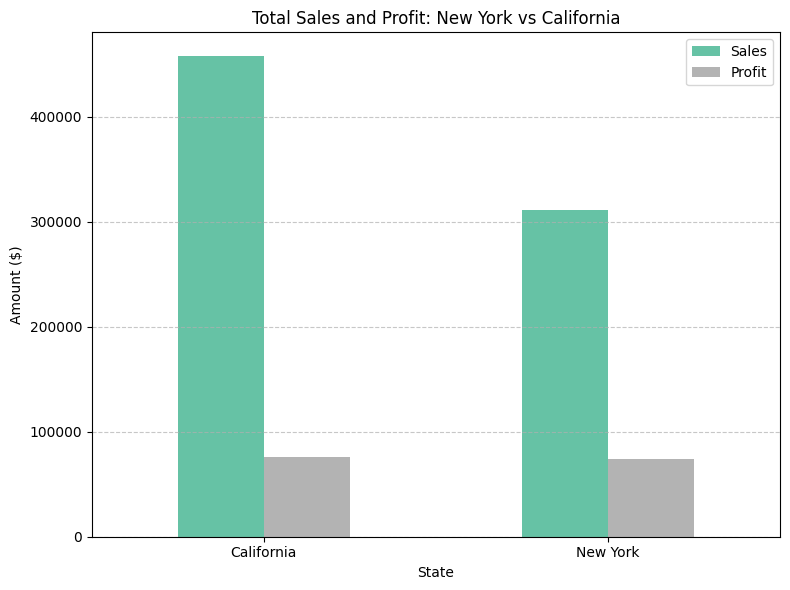

0       16.00
1       30.00
2       47.00
3      -40.00
4       11.25
        ...  
9989    16.25
9990    17.00
9991     7.50
9992    45.00
9993    30.00
Name: Profit Margin, Length: 9994, dtype: float64


In [17]:
#2 difference between NY and California.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("US Superstore data.xls")

%matplotlib inline
#Removal of duplicates
df = df.drop_duplicates()
#datetime format for date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
#df.head()
#removal of missing  data
missing_data = df.isnull().sum()

# Filter for New York and California
target_states = ['New York', 'California']
state_data = df[df['State'].isin(target_states)]

# Group by state and sum Sales and Profit
summary = state_data.groupby('State')[['Sales', 'Profit']].sum().reset_index()

# Print totals
print("Total Sales and Profit:")
print(summary)

# Plotting
plt.figure(figsize=(8, 6))
summary.set_index('State')[['Sales', 'Profit']].plot(kind='bar', figsize=(8, 6), colormap='Set2')
plt.title('Total Sales and Profit: New York vs California')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#calculation and chart of profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

print(df['Profit Margin'])
#print(missing_data.head())


In [ ]:
3# Top NY customer by sales

# Filter for New York customers
ny_df = df[df['State'] == 'New York']

# Group by customer and sum sales
ny_customer_sales = ny_df.groupby('Customer Name')['Sales'].sum()

# Find the customer with the highest total sales
top_customer = ny_customer_sales.idxmax()
top_sales = ny_customer_sales.max()

# Print the result
print(f"Top customer in New York by sales: {top_customer}")
print(f"Total Sales: ${top_sales:,.2f}")

Top customer in New York by sales: Tom Ashbrook
Total Sales: $13,723.50


Top 5 States by Profit:
 State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

Bottom 5 States by Profit:
 State
North Carolina    -7490.9122
Illinois         -12607.8870
Pennsylvania     -15559.9603
Ohio             -16971.3766
Texas            -25729.3563
Name: Profit, dtype: float64


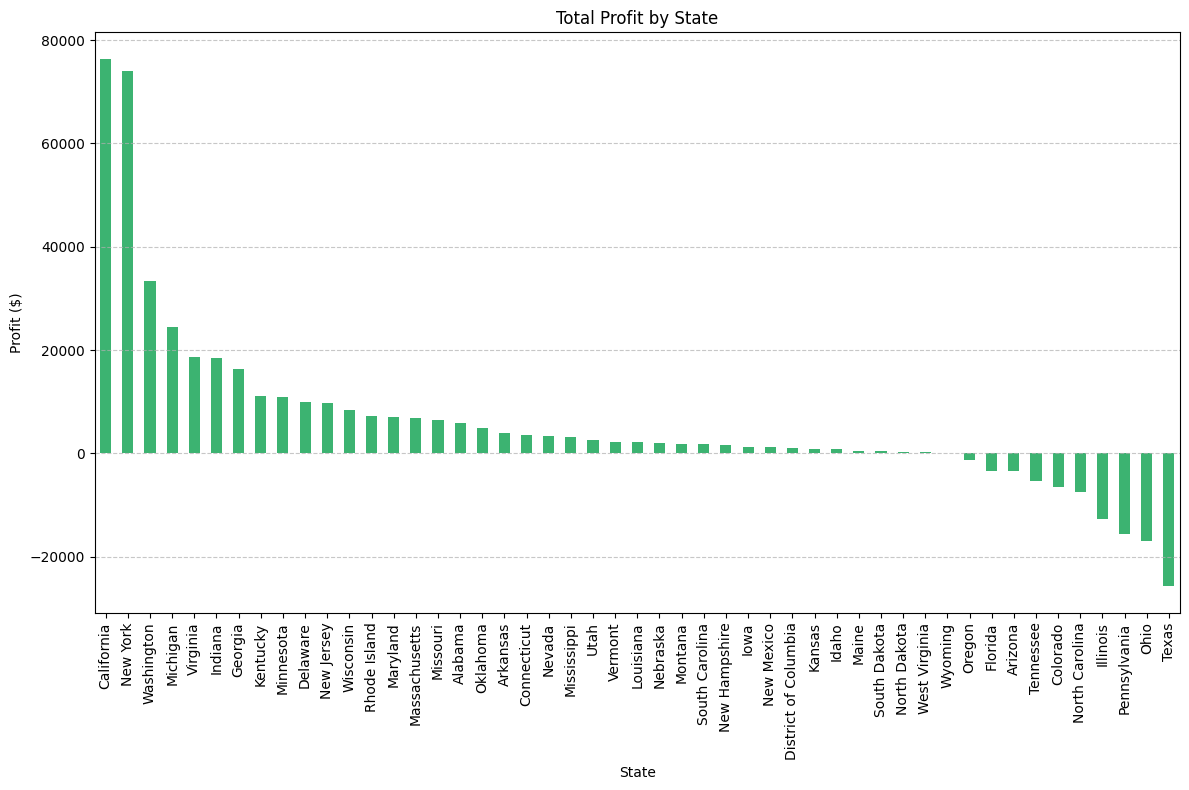

In [20]:
#4 Profit = Sales - Purchase Price

import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel("US Superstore data.xls")
df = df.drop_duplicates()

# Group by State and sum Profit
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

# Print top 5 and bottom 5 for quick insight
print("Top 5 States by Profit:\n", state_profit.head())
print("\nBottom 5 States by Profit:\n", state_profit.tail())

# Plotting the profit by state
plt.figure(figsize=(12, 8))
state_profit.plot(kind='bar', color='mediumseagreen')
plt.title('Total Profit by State')
plt.ylabel('Profit ($)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

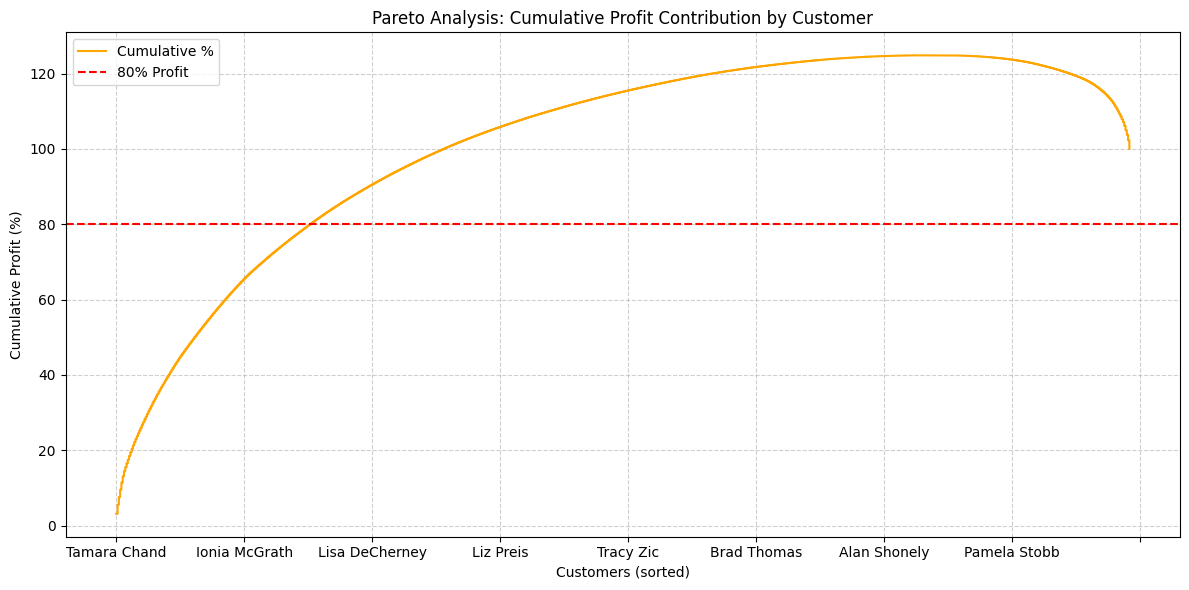

152 out of 793 customers contribute to 80% of the profit.
That's approximately 19.17% of the customers.


In [28]:
#5 Pareto principle
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel("US Superstore data.xls")
df = df.drop_duplicates()

# Group by customer and calculate total profit
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

# Calculate cumulative profit and percentage
cumulative_profit = customer_profit.cumsum()
total_profit = customer_profit.sum()
cumulative_percent = cumulative_profit / total_profit * 100

# Create DataFrame for plotting
pareto_df = pd.DataFrame({
    'Profit': customer_profit,
    'Cumulative %': cumulative_percent
})

# Plot
plt.figure(figsize=(12, 6))
pareto_df['Cumulative %'].plot(drawstyle='steps-post', color='orange')
plt.axhline(y=80, color='red', linestyle='--', label='80% Profit')
plt.title('Pareto Analysis: Cumulative Profit Contribution by Customer')
plt.xlabel('Customers (sorted)')
plt.ylabel('Cumulative Profit (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Determine number of customers needed to reach 80% of profit
customers_80 = (cumulative_percent <= 80).sum()
total_customers = len(customer_profit)
percent_customers = customers_80 / total_customers * 100

print(f"{customers_80} out of {total_customers} customers contribute to 80% of the profit.")
print(f"That's approximately {percent_customers:.2f}% of the customers.")

Top 20 Cities by Sales:

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64


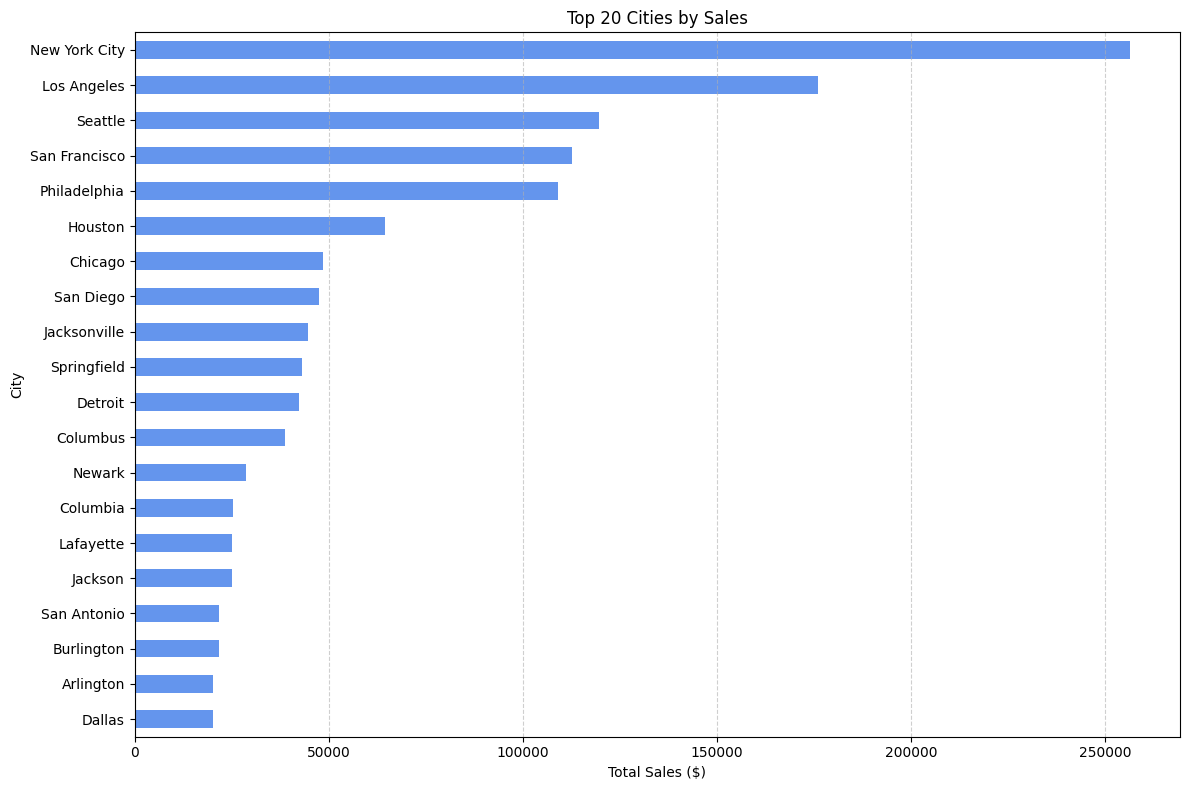

In [22]:
#6Top 20 Cities by Sales

import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel("US Superstore data.xls")
df = df.drop_duplicates()

# Group by City, sum Sales, and sort
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)

# Print the top 20 cities
print("Top 20 Cities by Sales:\n")
print(top_cities)

# Plot
plt.figure(figsize=(12, 8))
top_cities.plot(kind='barh', color='cornflowerblue')
plt.title('Top 20 Cities by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Highest sales on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


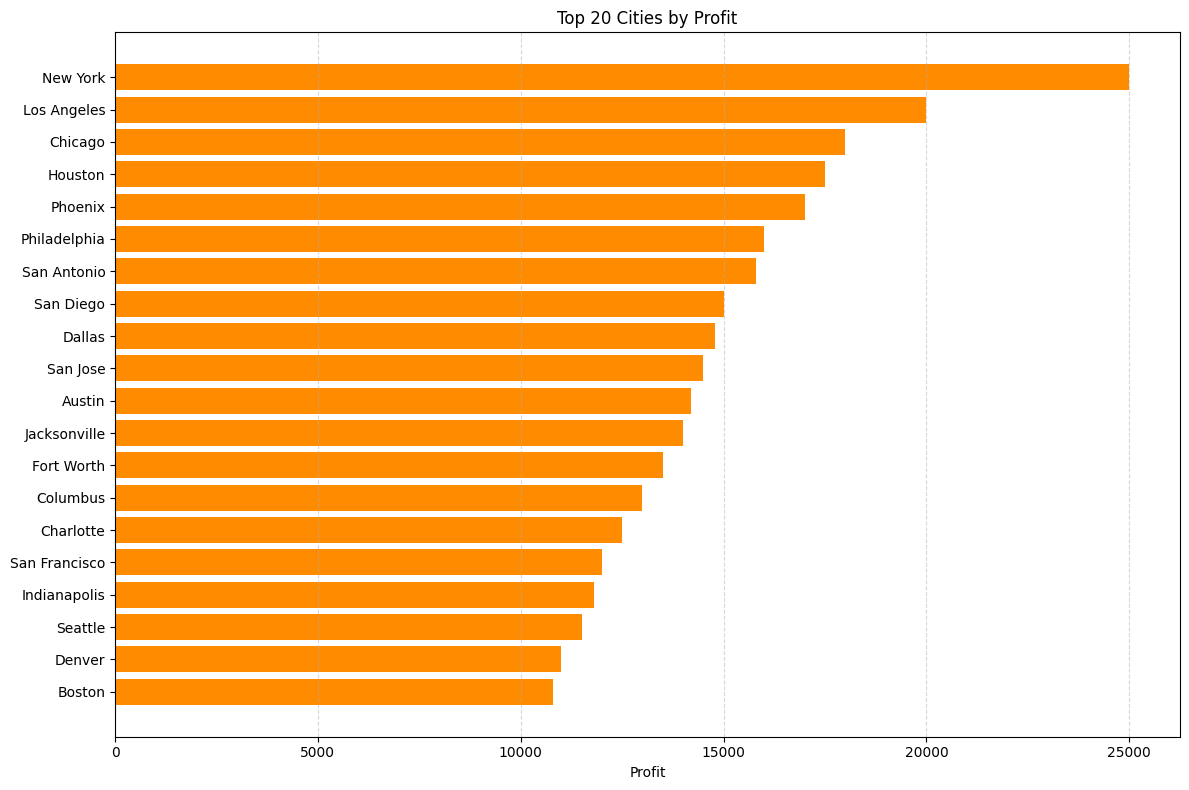

In [ ]:
#7Identify which 20 cities generate the highest total profit.

import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel("US Superstore data.xls")
df = df.drop_duplicates()

df = pd.DataFrame(data)

# Sort and get top 20 cities by profit
top_20_profit = df.sort_values(by='Profit', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_20_profit['City'], top_20_profit['Profit'], color='darkorange')
plt.xlabel('Profit')
plt.title('Top 20 Cities by Profit')
plt.gca().invert_yaxis()  # Show highest at top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show() 

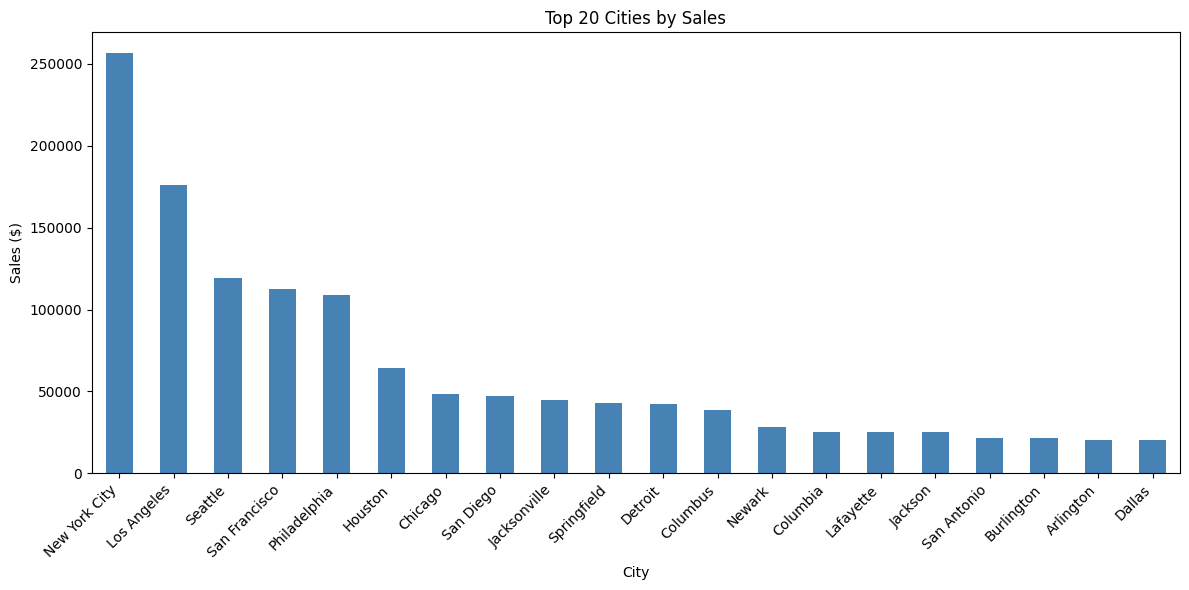

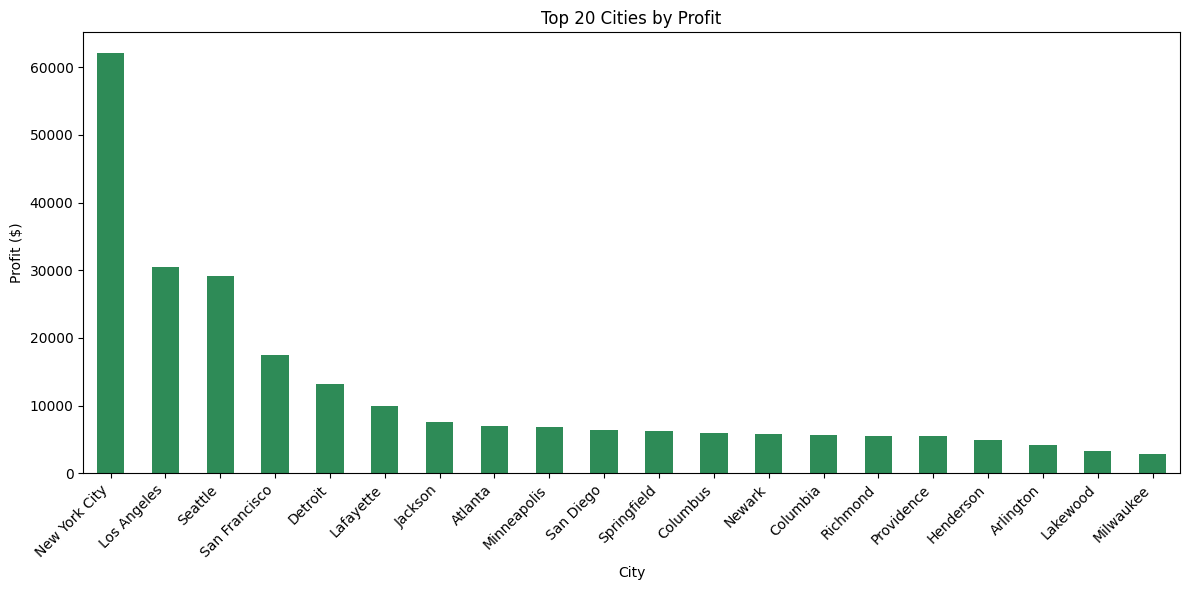

In [31]:
#8 Identify the top 20 cities

import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel("US Superstore data.xls")
df = df.drop_duplicates()

# Clean column names (in case of extra spaces)
df.columns = df.columns.str.strip()

# Group by City, sum Sales and Profit
city_summary = df.groupby('City')[['Sales', 'Profit']].sum()

# Get Top 20 cities by Sales
top20_sales = city_summary.sort_values(by='Sales', ascending=False).head(20)

# Get Top 20 cities by Profit
top20_profit = city_summary.sort_values(by='Profit', ascending=False).head(20)

# Plot Top 20 Cities by Sales
plt.figure(figsize=(12, 6))
top20_sales['Sales'].plot(kind='bar', color='steelblue')
plt.title('Top 20 Cities by Sales')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Top 20 Cities by Profit
plt.figure(figsize=(12, 6))
top20_profit['Profit'].plot(kind='bar', color='seagreen')
plt.title('Top 20 Cities by Profit')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 20 Customers by Sales:

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


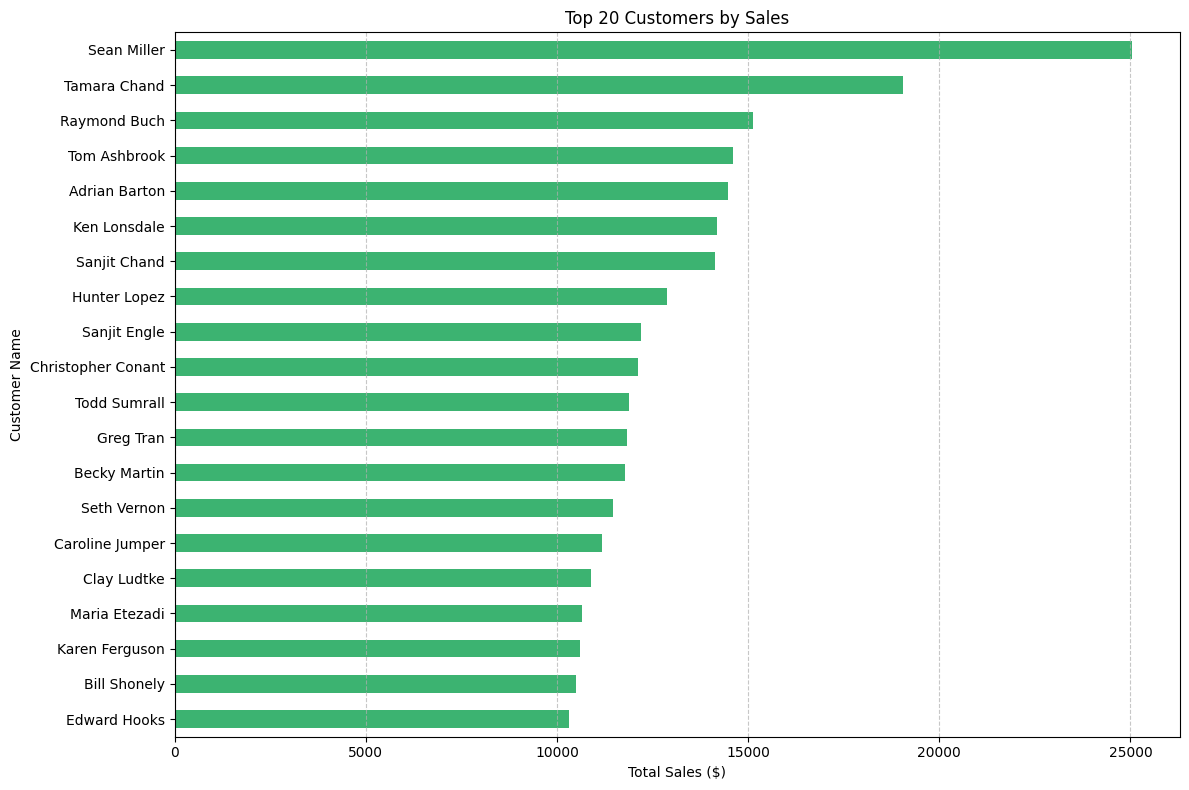

In [ ]:
#9 Top 20 customers by Sales
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel("US Superstore data.xls")
df = df.drop_duplicates()

# Group by Customer Name, sum Sales, sort descending, take top 20
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

# Print the top 20 customers
print("Top 20 Customers by Sales:\n")
print(top_customers)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
top_customers.plot(kind='barh', color='mediumseagreen')
plt.title('Top 20 Customers by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Name')
plt.gca().invert_yaxis()  # Highest sales at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

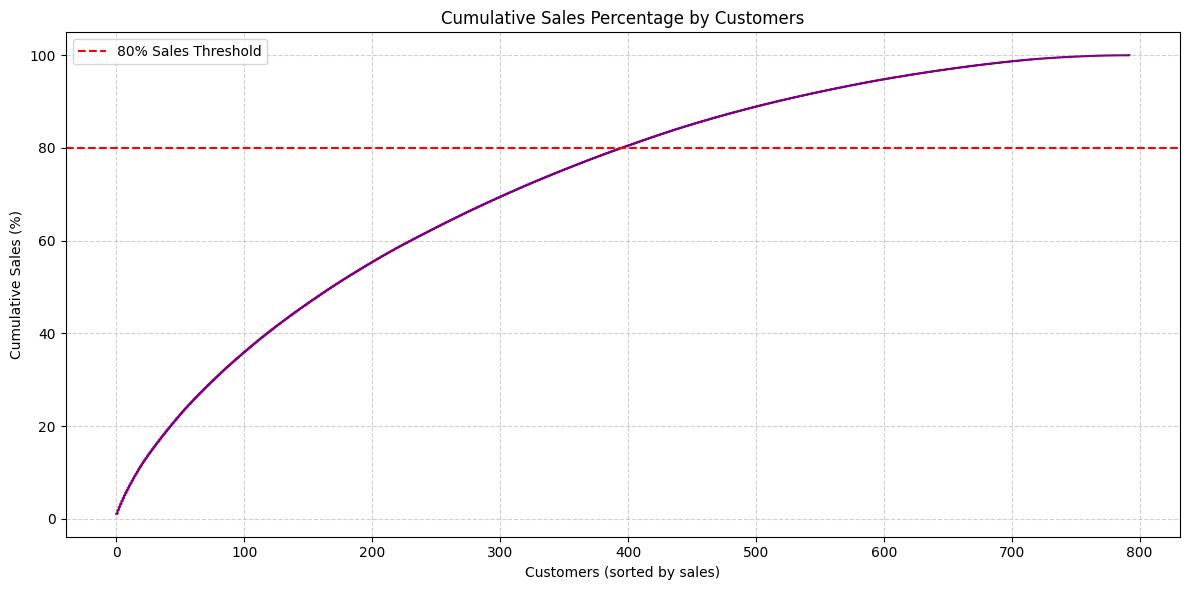

In [ ]:
#10 Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales?
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel("US Superstore data.xls")
df = df.drop_duplicates()

# Group by Customer, sum Sales, sort descending
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative sales and cumulative percentage
cumulative_sales = customer_sales.cumsum()
total_sales = customer_sales.sum()
cumulative_percent = cumulative_sales / total_sales * 100

# Plot cumulative sales percentage curve
plt.figure(figsize=(12, 6))
plt.plot(cumulative_percent.values, drawstyle='steps-post', color='purple')
plt.title('Cumulative Sales Percentage by Customers')
plt.xlabel('Customers (sorted by sales)')
plt.ylabel('Cumulative Sales (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(80, color='red', linestyle='--', label='80% Sales Threshold')
plt.legend()
plt.tight_layout()
plt.show()

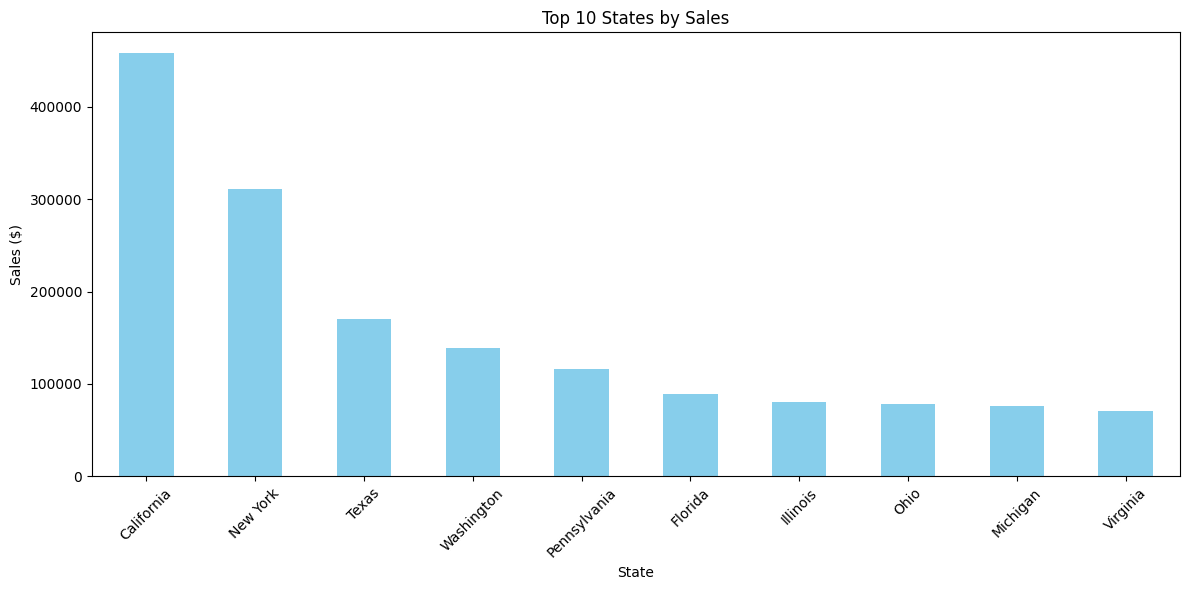

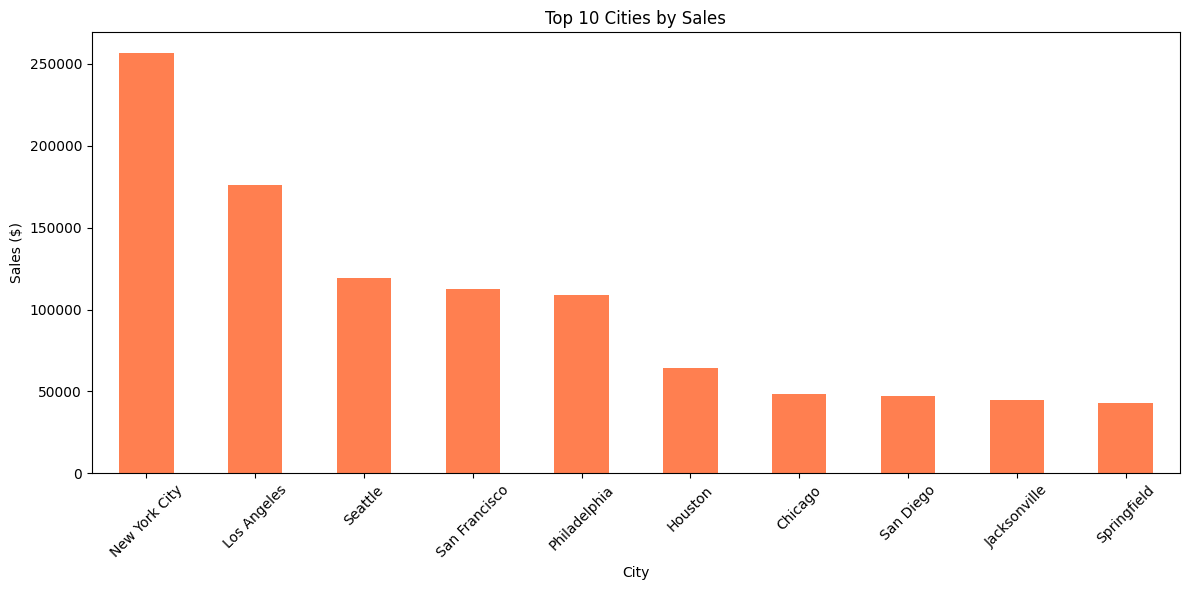

In [32]:
#11 Making Decisions concerning states and cities to prioritize and marketing strategies

import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel("US Superstore data.xls")
df = df.drop_duplicates()

# Aggregate sales and profit by State
state_summary = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Aggregate sales and profit by City
city_summary = df.groupby('City')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Top 10 States by Sales
plt.figure(figsize=(12, 6))
state_summary['Sales'].head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Sales')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Cities by Sales
plt.figure(figsize=(12, 6))
city_summary['Sales'].head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

Let us first summarize what we learnt about US Superstore:we identified the ten states with the best results, and noticed great differences between them, the tenth state representing only 15 % of the sales of California, the leader. The sales of California are far better than those of New York but when it comes to profit, the profitability ratio of NY is much better.  Whereas California and NY are very close to each other, and profitable, some states, the last ones on the list, make great losses.
The Pareto principle can be applied since 19 % of customers contribute to more than 80 % of the sales.
Now, regarding strategy: attention should be focused on states and cities with the best sales and profitability ratio, they should get budget to continue to improve their results, and most profitable cities should be targeted for localized marketing campaigns.
Concerning areas with high sales but low profits, cost reductions and better pricing strategies should be considered.
Last but not least, cities and states showing steady growth could also be a target for marketing operations. 



    




    